<a href="https://colab.research.google.com/github/ichiP245/TP-Anal-tica-Descriptiva/blob/main/notebooks/ModeloRL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importacion de librerias

Cargamos las librerias y el dataset nuevo ya limpio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm
import time
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('/content/Lianjia Clean.csv',sep=';')

/tmp/ipython-input-2911200300.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Lianjia Clean.csv',sep=';')


In [ ]:
df.head()

,url,id,Lng,Lat,Cid,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,distancia_km_a_subte_mas_cercano,piso
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,736185,106,4150080.00,31680,131.00,2,1,1,1,高 26,1.0,2005.0,3,6,0.217,1,0,1.0,7,56021.0,0.733077,26
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,736173,126,5750057.68,43436,132.38,2,2,1,2,高 22,1.0,2004.0,4,6,0.667,1,1,0.0,7,71539.0,0.707238,22
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,736309,48,10300158.00,52021,198.00,3,2,1,3,中 4,4.0,2005.0,3,6,0.500,1,0,0.0,7,48160.0,2.391765,4
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,736237,138,2975068.00,22202,134.00,3,1,1,1,底 21,1.0,2008.0,1,6,0.273,1,0,0.0,6,51238.0,2.150789,21
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,736204,286,3920076.00,48396,81.00,2,1,1,1,中 6,4.0,1960.0,2,2,0.333,0,1,1.0,1,62588.0,0.763286,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318539 entries, 0 to 318538
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   url                               318539 non-null  object 
 1   id                                318539 non-null  object 
 2   Lng                               318539 non-null  float64
 3   Lat                               318539 non-null  float64
 4   Cid                               318539 non-null  int64  
 5   tradeTime                         318539 non-null  int64  
 6   followers                         318539 non-null  int64  
 7   totalPrice                        318539 non-null  float64
 8   price                             318539 non-null  int64  
 9   square                            318539 non-null  float64
 10  livingRoom                        318539 non-null  int64  
 11  drawingRoom                       318539 non-null  i

Esta todo ok

Definimos X e y

In [4]:
columnas_X = ['tradeTime', 'followers', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
              'bathRoom', 'buildingType', 'constructionTime', 'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator', 'fiveYearsProperty',
              'district', 'communityAverage', 'distancia_km_a_subte_mas_cercano', 'piso']
columna_Y = 'totalPrice'
columna_Y2 = 'price'

In [5]:
X = df[columnas_X]
y = df[columna_Y]
y2 = df[columna_Y2]

In [ ]:
X

,tradeTime,followers,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,district,communityAverage,distancia_km_a_subte_mas_cercano,piso
0,736185,106,131.00,2,1,1,1,1.0,2005.000000,3,6,0.217,1,0,7,56021.0,0.733077,26
1,736173,126,132.38,2,2,1,2,1.0,2004.000000,4,6,0.667,1,1,7,71539.0,0.707238,22
2,736309,48,198.00,3,2,1,3,4.0,2005.000000,3,6,0.500,1,0,7,48160.0,2.391765,4
3,736237,138,134.00,3,1,1,1,1.0,2008.000000,1,6,0.273,1,0,6,51238.0,2.150789,21
4,736204,286,81.00,2,1,1,1,4.0,1960.000000,2,2,0.333,0,1,1,62588.0,0.763286,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318534,736125,8,170.07,3,2,1,2,4.0,2003.000000,1,6,0.333,0,1,3,36545.0,2.059801,5
318535,736125,1,35.09,1,0,1,1,1.0,2009.000000,1,6,0.222,1,0,3,54282.0,0.685682,24
318536,736120,2,102.17,2,2,1,2,4.0,2000.000000,3,6,0.500,1,1,3,46927.0,0.646323,7
318537,736127,4,178.34,4,2,1,2,4.0,2003.000000,4,2,0.500,0,1,3,54842.0,0.507385,5


In [6]:
y.describe()

,totalPrice
count,3.185390e+05
mean,3.493588e+06
std,2.306541e+06
min,3.950000e+04
25%,2.050008e+06
50%,2.940854e+06
75%,4.260018e+06
max,1.813016e+08


In [ ]:
# Vemos cantidad de valores unicos por columna
pocas_cols = []
categorias = []
for col in X:
  n_values = X[col].nunique()
  if n_values<=3:
    categorias.append(col)
  print(f'{col}: ', n_values)

tradeTime:  2550
followers:  547
square:  18292
livingRoom:  8
drawingRoom:  3
kitchen:  3
bathRoom:  4
buildingType:  10
constructionTime:  158
renovationCondition:  4
buildingStructure:  6
ladderRatio:  181
elevator:  2
fiveYearsProperty:  2
district:  13
communityAverage:  4455
distancia_km_a_subte_mas_cercano:  4034
piso:  40


In [ ]:
# Vemos de las categorias con pocos valores, cada valor que procentaje del total representa
for col in categorias:
  print(df[col].value_counts()/df.shape[0])

drawingRoom
1    0.707819
2    0.230408
0    0.061773
Name: count, dtype: float64
kitchen
1    0.988934
0    0.008401
2    0.002665
Name: count, dtype: float64
elevator
1    0.5771
0    0.4229
Name: count, dtype: float64
fiveYearsProperty
1    0.645745
0    0.354255
Name: count, dtype: float64


'kitchen' es casi toda 1. Casi 99% es 1, por lo que ni siquiera haciendola binaria 'tiene cocina o no' serviria para el modelo. Al ser practicamente la totalidad de los valores un unico valor, consideramos que no sirve tampoco como categorica y procedemos a descartarla.

In [ ]:
# Eliminamos 'kitchen'
X = X.drop('kitchen',axis=1)

## Encoding de categoricas

No hace falta, porque para 'elevator' y 'fiveYearsProperty' que usariamos One Hot, nos quedaria una sola columna si eliminamos la segunda (drop_first=True).

Sí para los distritos y otras variables categoricas nominales.


In [ ]:
X.head()

,tradeTime,followers,square,livingRoom,drawingRoom,bathRoom,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,district,communityAverage,distancia_km_a_subte_mas_cercano,piso
0,736185,106,131.00,2,1,1,1.0,2005.0,3,6,0.217,1,0,7,56021.0,0.733077,26
1,736173,126,132.38,2,2,2,1.0,2004.0,4,6,0.667,1,1,7,71539.0,0.707238,22
2,736309,48,198.00,3,2,3,4.0,2005.0,3,6,0.500,1,0,7,48160.0,2.391765,4
3,736237,138,134.00,3,1,1,1.0,2008.0,1,6,0.273,1,0,6,51238.0,2.150789,21
4,736204,286,81.00,2,1,1,4.0,1960.0,2,2,0.333,0,1,1,62588.0,0.763286,6


Convertimos a tipo de dato objeto para despues convertir esas variables en dummie

In [ ]:
X['district'] = X['district'].astype('object')

X['buildingType'] = X['buildingType'].astype('int64')
X['buildingType'] = X['buildingType'].astype('object')

X['renovationCondition'] = X['renovationCondition'].astype('object')
X['buildingStructure'] = X['buildingStructure'].astype('object')

Pasamos a dummies

In [ ]:
# Convertimos las variables correspondientes en dummies
X = pd.get_dummies(X,drop_first=True)
X

,tradeTime,followers,square,livingRoom,drawingRoom,bathRoom,constructionTime,ladderRatio,elevator,fiveYearsProperty,communityAverage,distancia_km_a_subte_mas_cercano,piso,buildingType_2,buildingType_3,buildingType_4,renovationCondition_2,renovationCondition_3,renovationCondition_4,buildingStructure_2,buildingStructure_3,buildingStructure_4,buildingStructure_5,buildingStructure_6,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_13
0,736185,106,131.00,2,1,1,2005.000000,0.217,1,0,56021.0,0.733077,26,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
1,736173,126,132.38,2,2,2,2004.000000,0.667,1,1,71539.0,0.707238,22,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
2,736309,48,198.00,3,2,3,2005.000000,0.500,1,0,48160.0,2.391765,4,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
3,736237,138,134.00,3,1,1,2008.000000,0.273,1,0,51238.0,2.150789,21,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
4,736204,286,81.00,2,1,1,1960.000000,0.333,0,1,62588.0,0.763286,6,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318534,736125,8,170.07,3,2,2,2003.000000,0.333,0,1,36545.0,2.059801,5,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
318535,736125,1,35.09,1,0,1,2009.000000,0.222,1,0,54282.0,0.685682,24,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
318536,736120,2,102.17,2,2,2,2000.000000,0.500,1,1,46927.0,0.646323,7,False,False,True,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
318537,736127,4,178.34,4,2,2,2003.000000,0.500,0,1,54842.0,0.507385,5,False,False,True,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Pasamos las dummies a numero entero
X = pd.get_dummies(X,drop_first=True)
for col in X.columns:
  if col.startswith('district_') or col.startswith('buildingType_') or col.startswith('renovationCondition_') or col.startswith('buildingStructure_'):
    X[col] = X[col].astype(int)

## Estandarizamos

Estandarizamos las variables numericas continuas, o sea que no consideramos como discretas.

Lo hacemos para que no sea tan sensibles a las escalas y porque se suele recomendar escalar en modelos de regresión.

In [ ]:
X.columns

Index(['tradeTime', 'followers', 'square', 'livingRoom', 'drawingRoom',
       'bathRoom', 'constructionTime', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'communityAverage',
       'distancia_km_a_subte_mas_cercano', 'piso', 'buildingType_2',
       'buildingType_3', 'buildingType_4', 'renovationCondition_2',
       'renovationCondition_3', 'renovationCondition_4', 'buildingStructure_2',
       'buildingStructure_3', 'buildingStructure_4', 'buildingStructure_5',
       'buildingStructure_6', 'district_2', 'district_3', 'district_4',
       'district_5', 'district_6', 'district_7', 'district_8', 'district_9',
       'district_10', 'district_11', 'district_12', 'district_13'],
      dtype='object')

In [ ]:
# Estandarizamos todas las variables salvo las dummies
vars_estandarizar = [col for col in X.columns if X[col].nunique()>2]

In [ ]:
scaler = StandardScaler()
X[vars_estandarizar] = scaler.fit_transform(X[vars_estandarizar])

## Correlaciones

Vamos a ver si podemos identificar si hay multicolinealidad.

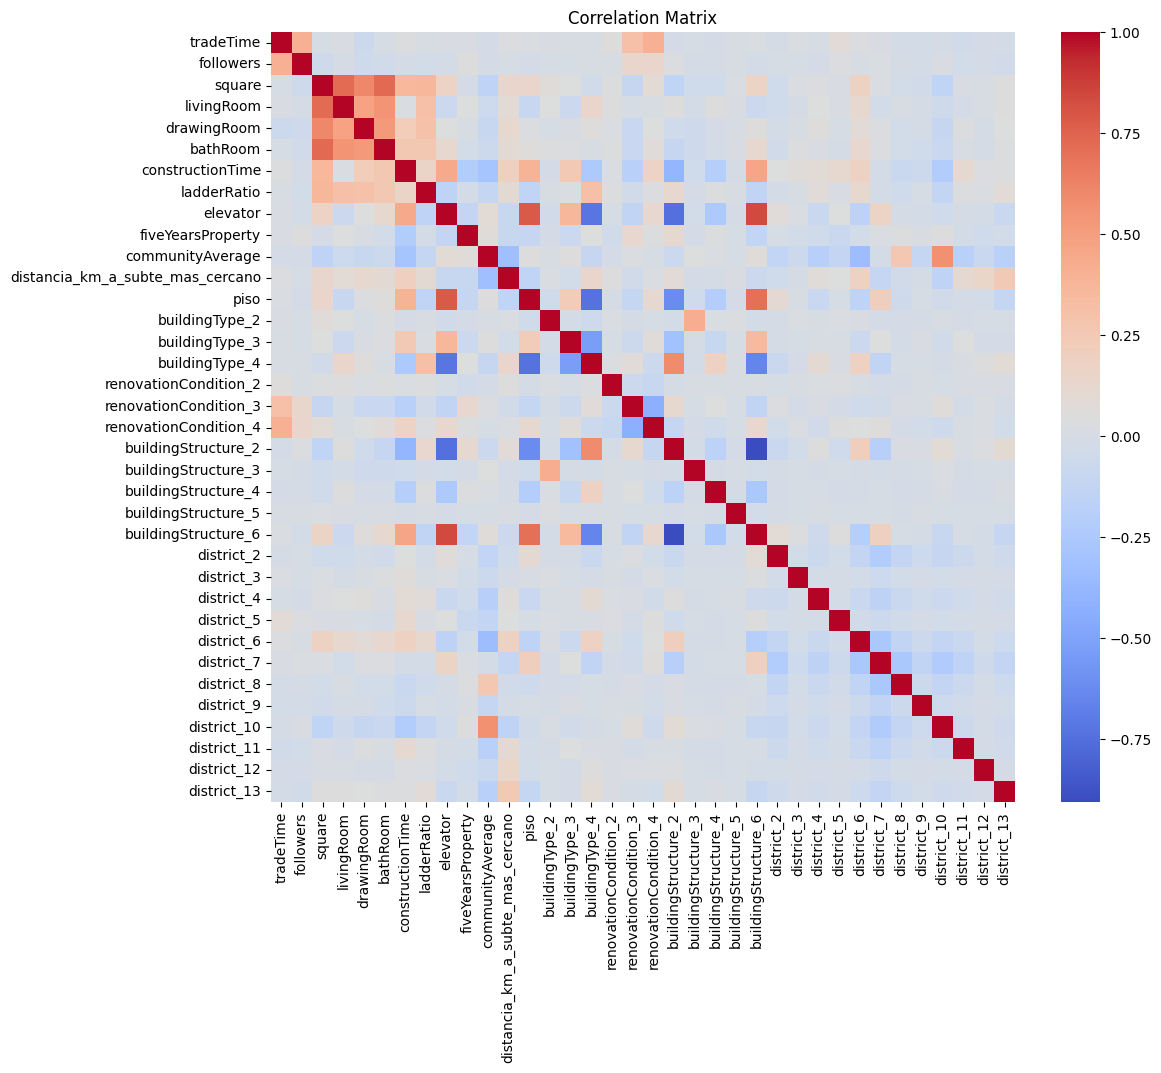

In [ ]:
# Calculamos matriz de correlacion
corr_matrix = X.corr()

# Visualizamos
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Vemos solo las correlaciones mayores a 0,4, o sea que tienen cierta fuerza

In [ ]:
# Filtramos correlaciones mayor a un umbral
threshold = 0.4
strong_correlations = corr_matrix[abs(corr_matrix) > threshold]

# Mostramos esas correlaciones
display(strong_correlations)

,tradeTime,followers,square,livingRoom,drawingRoom,bathRoom,constructionTime,ladderRatio,elevator,fiveYearsProperty,communityAverage,distancia_km_a_subte_mas_cercano,piso,buildingType_2,buildingType_3,buildingType_4,renovationCondition_2,renovationCondition_3,renovationCondition_4,buildingStructure_2,buildingStructure_3,buildingStructure_4,buildingStructure_5,buildingStructure_6,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_13
tradeTime,1.000000,0.410741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.405547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
followers,0.410741,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
square,NaN,NaN,1.000000,0.722605,0.602871,0.731103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
livingRoom,NaN,NaN,0.722605,1.000000,0.480518,0.551674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drawingRoom,NaN,NaN,0.602871,0.480518,1.000000,0.517697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathRoom,NaN,NaN,0.731103,0.551674,0.517697,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
constructionTime,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.446450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.466936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ladderRatio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
elevator,NaN,NaN,NaN,NaN,NaN,NaN,0.446450,NaN,1.000000,NaN,NaN,NaN,0.777226,NaN,NaN,-0.723028,NaN,NaN,NaN,-0.746322,NaN,NaN,NaN,0.838156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fiveYearsProperty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Tener o no ascensor se relaciona con ciertos tipos de estructura del edificio y el piso lo mismo.

La cantidad de metros cuadrados se relaciona con las habitaciones y baños, variables que tienen sentido que se relacionen.

Pasamos a analziar relaciones entre variables aisladas:

Vemos que hay diversidad. No estan relacionadas

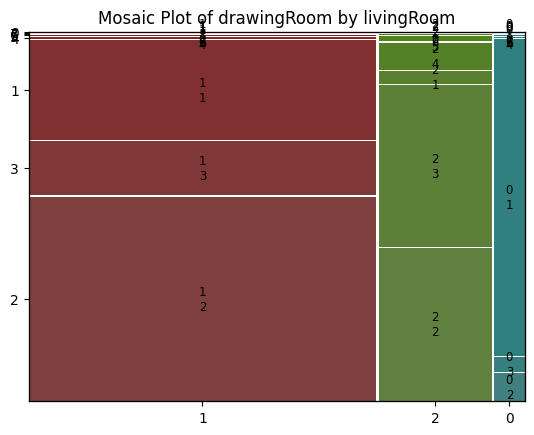

In [ ]:
vars_mosaic = ['drawingRoom','livingRoom']
mosaic(df, vars_mosaic)
plt.title(f'Mosaic Plot of {vars_mosaic[0]} by {vars_mosaic[1]}')
plt.show()

drawingRoom y bathRoom no estan relacionadas. Las proporciones son distintas para distintos valores de las variables.

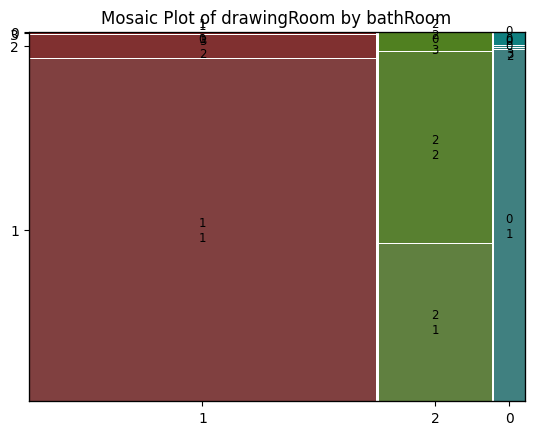

In [ ]:
vars_mosaic = ['drawingRoom','bathRoom']
mosaic(df, vars_mosaic)
plt.title(f'Mosaic Plot of {vars_mosaic[0]} by {vars_mosaic[1]}')
plt.show()

Tener o no ascensor sí se relaciona con el tipo de edificio. Ser del tipo 4 es sinónimo de no tener ascensor.

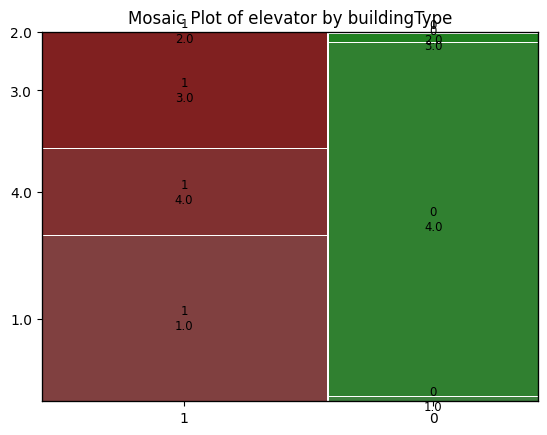

In [ ]:
vars_mosaic = ['elevator','buildingType']
mosaic(df, vars_mosaic)
plt.title(f'Mosaic Plot of {vars_mosaic[0]} by {vars_mosaic[1]}')
plt.show()

## Dividimos datos

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelos

Definimos funciones que vamos a usar más abajo

In [ ]:
def root_mean_squared_error(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
def forward_selection(X, y,AIC=True, verbose=True):
    remaining = list(X.columns)
    selected = []
    current_score, best_new_score = np.inf, np.inf
    while remaining:
        scores_with_candidates = []
        for candidate in remaining:
            formula = selected + [candidate]
            X_model = sm.add_constant(X[formula])
            model = sm.OLS(y, X_model).fit()
            if AIC:
              aic = model.aic
              scores_with_candidates.append((aic, candidate))
            else:
              bic = model.bic
              scores_with_candidates.append((bic, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates[0]
        if current_score > best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
            if verbose:
              if AIC:
                print(f"Añadido: {best_candidate}, AIC = {current_score:.2f}")
              else:
                print(f"Añadido: {best_candidate}, BIC = {current_score:.2f}")
        else:
            break
    return selected

In [ ]:
def backward_elimination(X, y,AIC=True, verbose=True):
    selected = list(X.columns)
    current_score = np.inf
    while len(selected) > 0:
        scores_with_candidates = []
        for candidate in selected:
            formula = list(selected)
            formula.remove(candidate)
            X_model = sm.add_constant(X[formula], has_constant='add')
            try:
                model = sm.OLS(y, X_model).fit(disp=0)
                if AIC:
                  aic = model.aic
                  scores_with_candidates.append((aic, candidate))
                else:
                  bic = model.bic
                  scores_with_candidates.append((bic, candidate))
            except:
                continue
        if not scores_with_candidates:
            break
        scores_with_candidates.sort()
        best_new_score, worst_candidate = scores_with_candidates[0]
        if best_new_score < current_score:              # Chequear esta condicion
            selected.remove(worst_candidate)
            current_score = best_new_score
            if verbose:
              if AIC:
                print(f"Eliminado: {worst_candidate}, AIC = {current_score:.2f}")
              else:
                print(f"Eliminado: {worst_candidate}, BIC = {current_score:.2f}")
        else:
            break
    return selected

In [ ]:
# Función para guardar los resultados
def guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion):
    # Calcular las métricas
    RMSE = root_mean_squared_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)

    # Crear un diccionario con los resultados
    resultados_dict = {
        'Modelo': [nombre_modelo],
        'RMSE': [RMSE],
        'MSE': [MSE],
        'MAE': [MAE],
        'R2': [R2],
        'Tiempo': [tiempo_ejecucion]
    }

    # Convertir el diccionario a un DataFrame
    resultados_df = pd.DataFrame(resultados_dict)

    return resultados_df

In [ ]:
def plot_predictions_vs_actuals(y_test, y_pred):
    # Crear un DataFrame con las predicciones y los valores reales
    df = pd.DataFrame({'Real': y_test, 'Predicted': y_pred})

    # Establecer el estilo de seaborn
    sns.set(style="whitegrid")

    # Crear el gráfico de dispersión
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x='Real', y='Predicted', color='blue', alpha=0.6, label='Predicciones', s=80)

    # Añadir la línea de referencia y=x
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Línea y=x')

    # Añadir título y etiquetas
    plt.title('Valores Reales vs Predicciones', fontsize=12)
    plt.xlabel('Valores Reales', fontsize=10)
    plt.ylabel('Predicciones', fontsize=10)

    # Mostrar la leyenda y la cuadrícula
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.4)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

In [ ]:
# Función para entrenar el modelo, guardar métricas y mostrar matriz de confusión
def entrenar_modelo(modelo, nombre_modelo, X_train, y_train, X_test, y_test, tf=False):

    # Entrenamos el modelo y medimos el tiempo de ejecución
    start = time.time()
    if tf:
        modelo.fit(X_train, y_train)
    else:
        modelo = modelo.fit(X_train, y_train)
    end = time.time()
    tiempo_ejecucion = end - start

    # Predecimos
    y_pred = modelo.predict(X_test) if not tf else np.where(modelo.predict(X_test) > 0.5, 1, 0)

    # Guardamos los resultados en el DataFrame
    resultados = guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion)

    global resultados_df
    resultados_df = pd.concat([resultados_df, resultados], ignore_index=True)

    # Mostramos los resultados de este modelo
    print("Resultados para el modelo:", nombre_modelo)
    print(resultados, "\n")

    # Gráfico para evaluar las predicciones
    plot_predictions_vs_actuals(y_test, y_pred)

### Establecemos un baseline

Nunca un modelo nos puede dar peor que este valor. El baseline va a ser el RMSE de predecir todas las propiedades con el promedio de precio de venta de las propiedades del set de entrenamiento

In [ ]:
start1 = time.time()
root_mean_squared_error(y_test, [y_train.mean()]*len(y_test))
end1 = time.time()

In [ ]:
model0 = guardo_resultados('Baseline', y_test, [y_train.mean()]*len(y_test), end1-start1)
model0

,Modelo,RMSE,MSE,MAE,R2,Tiempo
0,Baseline,2.281218e+06,5.203953e+12,1.553759e+06,-0.000008,0.027377


### Modelo 1: regresion lineal multiple simple

Usamos todas las variables y corremos el primer modelo lineal multiple

Resultados para el modelo: Regresion Lineal (todas vars)
                          Modelo          RMSE           MSE            MAE  \
0  Regresion Lineal (todas vars)  1.071653e+06  1.148440e+12  695234.429285   

         R2    Tiempo  
0  0.779312  0.443579   



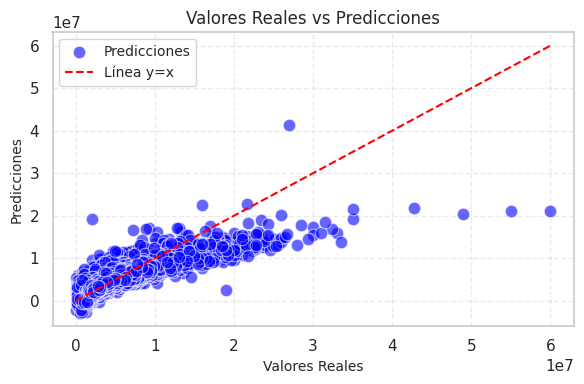

In [ ]:
m = LinearRegression(fit_intercept=True)
resultados_df = model0.copy()
entrenar_modelo(m, 'Regresion Lineal (todas vars)', X_train, y_train, X_test, y_test)

In [ ]:
resultados_df

,Modelo,RMSE,MSE,MAE,R2,Tiempo
0,Baseline,2.281218e+06,5.203953e+12,1.553759e+06,-0.000008,0.027377
1,Regresion Lineal (todas vars),1.071653e+06,1.148440e+12,6.952344e+05,0.779312,0.443579


In [ ]:
# start2 = time.time()
# linear_model = LinearRegression(fit_intercept=True)  # fit_intercept es el único parámetro relevante
# linear_model.fit(X_train, y_train)

# y_pred = linear_model.predict(X_test)
# end2 = time.time()

In [ ]:
# model1 = guardo_resultados('Regresion lineal multiple simple', y_test, y_pred, end2-start2)
# model1 = pd.concat([model1,model0])
# model1

,Modelo,RMSE,MSE,MAE,R2,Tiempo
0,Regresion lineal multiple simple,1.071566e+06,1.148253e+12,6.952304e+05,0.779348,0.291104
0,Baseline,2.281218e+06,5.203953e+12,1.553759e+06,-0.000008,0.004349


Vemos cuales son las variables mas importantes

In [ ]:
# Vemos variables mas importantes

selector = SelectKBest(score_func=f_regression, k=20)
X_new = selector.fit_transform(X_train, y_train)
print("Selected feature indices:")
lista = X_train.columns[selector.get_support(indices=True)].to_list()
for i in range(len(lista)):
  print(f'{i+1}. {lista[i]}')

Selected feature indices:
1. tradeTime
2. followers
3. square
4. livingRoom
5. drawingRoom
6. bathRoom
7. constructionTime
8. ladderRatio
9. elevator
10. communityAverage
11. distancia_km_a_subte_mas_cercano
12. piso
13. renovationCondition_4
14. buildingStructure_2
15. buildingStructure_6
16. district_6
17. district_8
18. district_10
19. district_11
20. district_13


In [ ]:
# Variables menos importantes
[i for i in X.columns if i not in lista]

['fiveYearsProperty',
 'buildingType_2',
 'buildingType_3',
 'buildingType_4',
 'renovationCondition_2',
 'renovationCondition_3',
 'buildingStructure_3',
 'buildingStructure_4',
 'buildingStructure_5',
 'district_2',
 'district_3',
 'district_4',
 'district_5',
 'district_7',
 'district_9',
 'district_12']

Hacemos un forward_selection.

Abajo estan comentados. Pero vimos que la mayoria se seleccionan.

In [ ]:
seleccionadas_f_A = forward_selection(X_train, y_train)

print("\nVariables seleccionadas:", seleccionadas_f_A)
print("\nCantidad de variables seleccionadas: ",len(seleccionadas_f_A))
print("\nCantidad de variables totales: ",len(X_train.columns))

Añadido: square, AIC = 8088163.72
Añadido: communityAverage, AIC = 7961229.77
Añadido: tradeTime, AIC = 7828620.48
Añadido: district_10, AIC = 7823866.68
Añadido: district_6, AIC = 7820837.36
Añadido: renovationCondition_3, AIC = 7818399.19
Añadido: renovationCondition_4, AIC = 7815066.47
Añadido: renovationCondition_2, AIC = 7812753.43
Añadido: ladderRatio, AIC = 7811844.86
Añadido: district_13, AIC = 7811063.34
Añadido: district_5, AIC = 7810302.72
Añadido: buildingStructure_6, AIC = 7809625.50
Añadido: followers, AIC = 7808922.60
Añadido: fiveYearsProperty, AIC = 7808476.42
Añadido: distancia_km_a_subte_mas_cercano, AIC = 7808019.34
Añadido: district_9, AIC = 7807638.58
Añadido: district_7, AIC = 7807252.09
Añadido: district_2, AIC = 7806876.12
Añadido: district_8, AIC = 7806199.17
Añadido: district_12, AIC = 7805871.29
Añadido: piso, AIC = 7805594.41
Añadido: bathRoom, AIC = 7805338.48
Añadido: constructionTime, AIC = 7805089.79
Añadido: district_3, AIC = 7805004.12
Añadido: buildi

Solo sacamos 2 variables

In [ ]:
set(X_train) - set(seleccionadas_f_A)

{'buildingStructure_5'}

In [ ]:
seleccionadas_f_B = forward_selection(X_train, y_train, AIC=False)

print("\nVariables seleccionadas:", seleccionadas_f_B)
print("\nCantidad de variables seleccionadas: ",len(seleccionadas_f_B))
print("\nCantidad de variables totales: ",len(X_train.columns))

Añadido: square, BIC = 8088184.61
Añadido: communityAverage, BIC = 7961261.12
Añadido: tradeTime, BIC = 7828662.27
Añadido: district_10, BIC = 7823918.93
Añadido: district_6, BIC = 7820900.05
Añadido: renovationCondition_3, BIC = 7818472.32
Añadido: renovationCondition_4, BIC = 7815150.06
Añadido: renovationCondition_2, BIC = 7812847.47
Añadido: ladderRatio, BIC = 7811949.34
Añadido: district_13, BIC = 7811178.27
Añadido: district_5, BIC = 7810428.10
Añadido: buildingStructure_6, BIC = 7809761.32
Añadido: followers, BIC = 7809068.87
Añadido: fiveYearsProperty, BIC = 7808633.14
Añadido: distancia_km_a_subte_mas_cercano, BIC = 7808186.52
Añadido: district_9, BIC = 7807816.20
Añadido: district_7, BIC = 7807440.16
Añadido: district_2, BIC = 7807074.64
Añadido: district_8, BIC = 7806408.14
Añadido: district_12, BIC = 7806090.71
Añadido: piso, BIC = 7805824.28
Añadido: bathRoom, BIC = 7805578.79
Añadido: constructionTime, BIC = 7805340.55
Añadido: district_3, BIC = 7805265.33
Añadido: buildi

In [ ]:
set(X_train) - set(seleccionadas_f_B)

{'buildingStructure_3', 'buildingStructure_5'}

Sacamos esas 2 variables

In [ ]:
# seleccionadas_b_A = backward_elimination(X_train, y_train)

# print("\nVariables seleccionadas:", seleccionadas_b_A)
# print("\nCantidad de variables seleccionadas: ",len(seleccionadas_b_A))
# print("\nCantidad de variables totales: ",len(X_train.columns))

In [ ]:
# seleccionadas_b_B = backward_elimination(X_train, y_train, AIC=False)

# print("\nVariables seleccionadas:", seleccionadas_b_B)
# print("\nCantidad de variables seleccionadas: ",len(seleccionadas_b_B))
# print("\nCantidad de variables totales: ",len(X_train.columns))

Corremos el modelo con *statsmodel* para ver los p-valores de las variables

In [ ]:
## Probamos con statsmodel para ver mas a las variables
X_train_sm = sm.add_constant(X_train)
log_reg_sm = sm.OLS(y_train, X_train_sm).fit()
print(log_reg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:             totalPrice   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                 2.527e+04
Date:                Tue, 18 Nov 2025   Prob (F-statistic):               0.00
Time:                        14:30:02   Log-Likelihood:            -3.9022e+06
No. Observations:              254831   AIC:                         7.805e+06
Df Residuals:                  254794   BIC:                         7.805e+06
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

La gran mayoría son significativas. Podemos sacar 'district_13'

### Modelo 1 bis: sacamos algunas variables

Nos quedamos con un grupo reducido de variables, sacando dummies para ver cuanto varian los resultados

In [ ]:
vars_probar = ['tradeTime', 'followers', 'square', 'livingRoom', 'drawingRoom',
      'bathRoom', 'constructionTime', 'ladderRatio', 'elevator',
       'communityAverage','distancia_km_a_subte_mas_cercano']

Corremos el modelo

Resultados para el modelo: Regresion Lineal (vars reducidas)
                              Modelo          RMSE           MSE  \
0  Regresion Lineal (vars reducidas)  1.113093e+06  1.238976e+12   

             MAE        R2    Tiempo  
0  730286.396353  0.761915  0.136792   



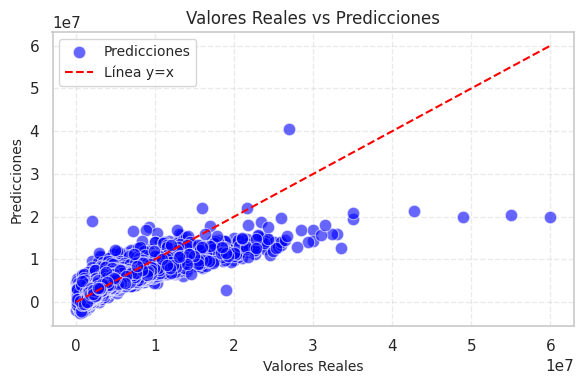

In [ ]:
m2 = LinearRegression(fit_intercept=True)
entrenar_modelo(m2, 'Regresion Lineal (vars reducidas)', X_train[vars_probar], y_train, X_test[vars_probar], y_test)

In [ ]:
resultados_df

,Modelo,RMSE,MSE,MAE,R2,Tiempo
0,Baseline,2.281218e+06,5.203953e+12,1.553759e+06,-0.000008,0.027377
1,Regresion Lineal (todas vars),1.071653e+06,1.148440e+12,6.952344e+05,0.779312,0.443579
2,Regresion Lineal (vars reducidas),1.113093e+06,1.238976e+12,7.302864e+05,0.761915,0.136792


In [ ]:
# start3 = time.time()
# linear_model = LinearRegression(fit_intercept=True)  # fit_intercept es el único parámetro relevante
# linear_model.fit(X_train[vars_probar], y_train)

# y_pred = linear_model.predict(X_test[vars_probar])
# end3 = time.time()

In [ ]:
# model2 = guardo_resultados('Regresion lineal multiple simple (bis)', y_test, y_pred, end3-start3)
# model2 = pd.concat([model2,model1])
# model2

,Modelo,RMSE,MSE,MAE,R2,Tiempo
0,Regresion lineal multiple simple (bis),1.113093e+06,1.238976e+12,7.302864e+05,0.761915,0.108613
0,Regresion lineal multiple simple,1.071566e+06,1.148253e+12,6.952304e+05,0.779348,0.291104
0,Baseline,2.281218e+06,5.203953e+12,1.553759e+06,-0.000008,0.004349


Vemos que el modelo empeoro. Casi un 2% menos de R^2 y aumento el RMSE

### Modelo 2: elevamos el grado del polinomio

Buscamos polinomios de mayor orden

Probamos para el ultimo grupo de variables como varian los errores a medida que aumenta el grado del polinomio

Mínimo de error en test con grado 3


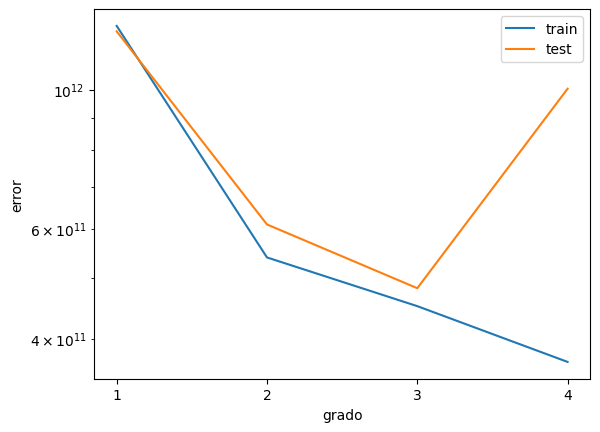

In [ ]:
# Graficamos los errores en train y test para distintos grados
train_errors = []
test_errors = []
degrees = np.arange(1, 5)
for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train2_poly = poly.fit_transform(X_train[vars_probar])
    reg = LinearRegression()
    reg.fit(X_train2_poly, y_train)
    train_errors.append(mean_squared_error(y_train, reg.predict(X_train2_poly)))
    test_errors.append(mean_squared_error(y_test, reg.predict(poly.transform(X_test[vars_probar]))))

plt.plot(degrees, train_errors, label='train')
plt.plot(degrees, test_errors, label='test')
plt.xticks(degrees)
plt.yscale('log')
plt.legend()
plt.xlabel('grado')
plt.ylabel('error')
print('Mínimo de error en test con grado',degrees[np.argmin(test_errors)])

A partir de 3, o sea cuando prueba con polinomio de grado 4, hay overfitting

Probamos con menos variables aun, pero mayor grado

Mínimo de error en test con grado 3


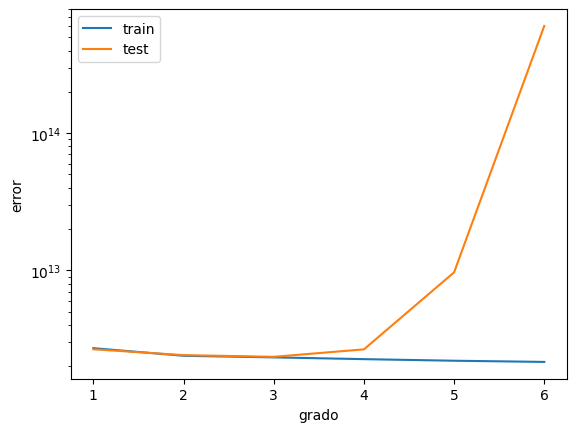

In [ ]:
# Graficamos los errores en train y test para distintos grados
train_errors = []
test_errors = []
degrees = np.arange(1, 7)
for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train2_poly = poly.fit_transform(X_train[vars_probar[:5]])
    reg = LinearRegression()
    reg.fit(X_train2_poly, y_train)
    train_errors.append(mean_squared_error(y_train, reg.predict(X_train2_poly)))
    test_errors.append(mean_squared_error(y_test, reg.predict(poly.transform(X_test[vars_probar[:5]]))))

plt.plot(degrees, train_errors, label='train')
plt.plot(degrees, test_errors, label='test')
plt.xticks(degrees)
plt.yscale('log')
plt.legend()
plt.xlabel('grado')
plt.ylabel('error')
print('Mínimo de error en test con grado',degrees[np.argmin(test_errors)])

In [ ]:
test_errors[np.argmin(test_errors)]

2343498509379.1826

Los resultados son muy malos. Nos quedamos con grado 3 de las variables reducidas

Resultados para el modelo: Modelo Polinomial (vars reducidas)
                               Modelo           RMSE           MSE  \
0  Modelo Polinomial (vars reducidas)  694108.531985  4.817867e+11   

             MAE        R2   Tiempo  
0  442683.403486  0.907418  24.3029   



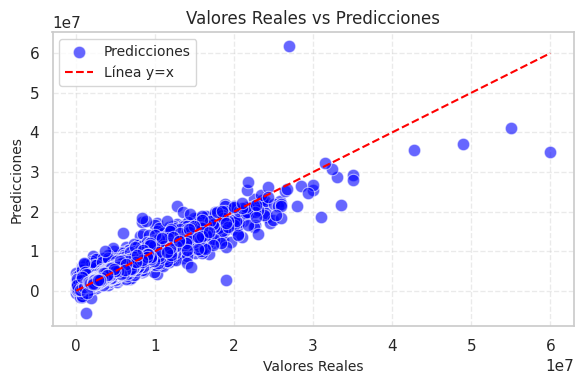

In [ ]:
start_modelo = time.time()
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train2_poly = poly.fit_transform(X_train[vars_probar])
X_test2_poly = poly.transform(X_test[vars_probar])

poly_model = LinearRegression()

entrenar_modelo(poly_model, 'Modelo Polinomial (vars reducidas)', X_train2_poly, y_train, X_test2_poly, y_test)

end_modelo = time.time()

In [ ]:
resultados_df.loc[resultados_df['Modelo'] == 'Modelo Polinomial (vars reducidas)', 'Tiempo'] = end_modelo - start_modelo

In [ ]:
resultados_df

,Modelo,RMSE,MSE,MAE,R2,Tiempo
0,Baseline,2.281218e+06,5.203953e+12,1.553759e+06,-0.000008,0.027377
1,Regresion Lineal (todas vars),1.071653e+06,1.148440e+12,6.952344e+05,0.779312,0.443579
2,Regresion Lineal (vars reducidas),1.113093e+06,1.238976e+12,7.302864e+05,0.761915,0.136792
3,Modelo Polinomial (vars reducidas),6.941085e+05,4.817867e+11,4.426834e+05,0.907418,27.755612


In [ ]:
# start4 = time.time()

# poly = PolynomialFeatures(degree=3, include_bias=False)
# X_train2_poly = poly.fit_transform(X_train[vars_probar])
# X_test2_poly = poly.transform(X_test[vars_probar])

# poly_model = LinearRegression()
# poly_model.fit(X_train2_poly, y_train)

# y_pred = poly_model.predict(X_test2_poly)
# end4 = time.time()

In [ ]:
# modelo3 = guardo_resultados('Regresion lineal multiple polinomial', y_test, y_pred, end4-start4)
# modelo3 = pd.concat([modelo3,model2])
# modelo3

,Modelo,RMSE,MSE,MAE,R2,Tiempo
0,Regresion lineal multiple polinomial,6.941085e+05,4.817867e+11,4.426834e+05,0.907418,8.029466
0,Regresion lineal multiple simple (bis),1.113093e+06,1.238976e+12,7.302864e+05,0.761915,0.108613
0,Regresion lineal multiple simple,1.071566e+06,1.148253e+12,6.952304e+05,0.779348,0.291104
0,Baseline,2.281218e+06,5.203953e+12,1.553759e+06,-0.000008,0.004349


El modelo mejoró considerablemente. Una reducción del RMSE de casi un 50% y R^2 de 90%

### Modelo 3: agregamos regularización (Ridge regularization)

Probamos ver qué pasa cuando regularizamos (grupo de variables reducidas de grado 3 que usamos para el modelo 2) pero los resultados de la regularizacion no justifican probar con ese modelo

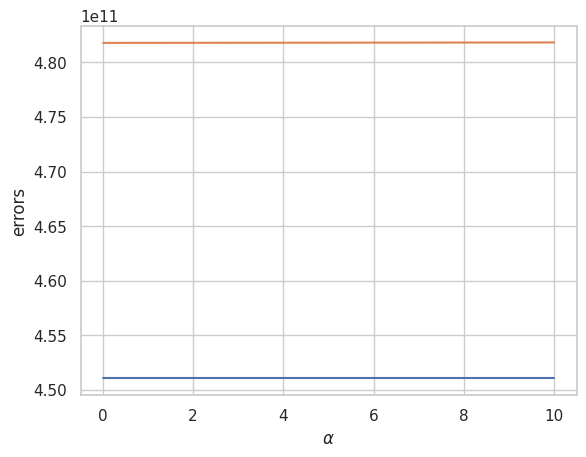

In [ ]:
# Vemos como varia el error cuadratico medio a medida que cambia el alpha
# (manteniendo constante el grado del polinomio de regresion)

alphas = np.linspace(0.01,10,50)
train_errors = []

test_errors = []
for alpha in alphas:
  reg_Ridge = Ridge(alpha=alpha)
  reg_Ridge.fit(X_train2_poly, y_train)
  train_error = mean_squared_error(y_train, reg_Ridge.predict(X_train2_poly))
  train_errors.append(train_error)
  test_error = mean_squared_error(y_test, reg_Ridge.predict(X_test2_poly))
  test_errors.append(test_error)

plt.plot(alphas,train_errors,'-')
plt.plot(alphas,test_errors,'-')
plt.xlabel(r'$\alpha$')
plt.ylabel('errors');

No nos funcionó la regularización, por lo que como el gráfico muestra un panorama desalentador, ni siquiera probamos el modelo.

Lo probaremos más adelante con un optimizador de hiperparámetros para ver si encontramos algún alpha que valga la pena.

### Modelo 4: Árbol de regresión (todas vars)

Corremos el árbol de regresión con todas las variables

In [ ]:
arbol_regresion = DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=5, random_state=42)

Resultados para el modelo: Arbol de regresion
               Modelo           RMSE           MSE            MAE      R2  \
0  Arbol de regresion  642392.799659  4.126685e+11  346048.638931  0.9207   

     Tiempo  
0  7.643816   



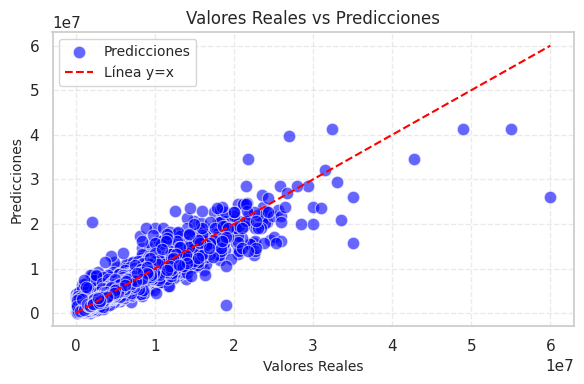

In [ ]:
entrenar_modelo(arbol_regresion, 'Arbol de regresion', X_train, y_train, X_test, y_test)

In [ ]:
arbol_regresion.get_n_leaves()

np.int64(40719)

In [ ]:
arbol_regresion.get_depth()

35

### Modelo 4 bis: solo con las variables reducidas

Resultados para el modelo: Arbol de regresion (vars reducidas)
                                Modelo         RMSE           MSE  \
0  Arbol de regresion (vars reducidas)  649008.3346  4.212118e+11   

             MAE        R2    Tiempo  
0  351748.005459  0.919059  4.159652   



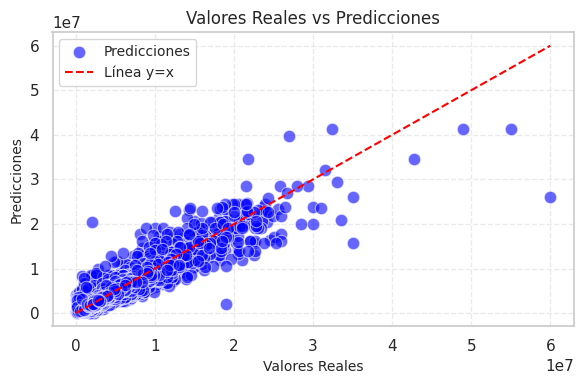

In [ ]:
arbol_regresion2 = DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=5, random_state=42)
entrenar_modelo(arbol_regresion2, 'Arbol de regresion (vars reducidas)', X_train[vars_probar], y_train, X_test[vars_probar], y_test)

In [ ]:
resultados_df

,Modelo,RMSE,MSE,MAE,R2,Tiempo
0,Baseline,2.281218e+06,5.203953e+12,1.553759e+06,-0.000008,0.027377
1,Regresion Lineal (todas vars),1.071653e+06,1.148440e+12,6.952344e+05,0.779312,0.443579
2,Regresion Lineal (vars reducidas),1.113093e+06,1.238976e+12,7.302864e+05,0.761915,0.136792
3,Modelo Polinomial (vars reducidas),6.941085e+05,4.817867e+11,4.426834e+05,0.907418,27.755612
4,Arbol de regresion,6.423928e+05,4.126685e+11,3.460486e+05,0.920700,7.643816
5,Arbol de regresion (vars reducidas),6.490083e+05,4.212118e+11,3.517480e+05,0.919059,4.159652


El arbol de decision aumenta nuestro R^2. Incluso con las variables reducidas se posiciona muy cercano y  el tiempo de ejecucion es muy reducido.

### Modelo 5 y 5 bis: Random Forest

Primero probamos con un grupo de las variables

Resultados para el modelo: Random Forest (vars reducidas)
                           Modelo           RMSE           MSE            MAE  \
0  Random Forest (vars reducidas)  630243.774321  3.972072e+11  374940.497207   

         R2      Tiempo  
0  0.923671  638.484918   



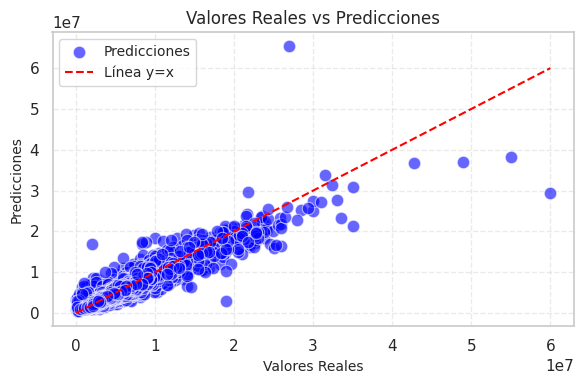

In [ ]:
rnd_rg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=500, max_depth=20, random_state=42)
entrenar_modelo(rnd_rg, 'Random Forest (vars reducidas)', X_train[vars_probar], y_train, X_test[vars_probar], y_test)

In [ ]:
# 1. Obtener la profundidad de cada árbol individual
depths = [tree.tree_.max_depth for tree in rnd_rg.estimators_]

# 2. Ver la profundidad del primer árbol (ejemplo)
print(f"Profundidad del primer árbol: {depths[0]}")

# 3. Calcular la profundidad promedio de todos los árboles
average_depth = np.mean(depths)
print(f"Profundidad promedio: {average_depth}")

# 4. Ver la profundidad máxima entre todos los árboles
max_depth_rf = np.max(depths)
print(f"Profundidad máxima: {max_depth_rf}")

Profundidad del primer árbol: 13
Profundidad promedio: 13.462
Profundidad máxima: 17


El modelo mejoró muy poco al árbol de regresión individual, lo que genera un poco de dudas. Quizá le dejamos demasiada libertad y pudo llegar a overfittear, es una hipótesis posible.

**Ahora probamos con todas las variables**

In [ ]:
resultados_df

,Modelo,RMSE,MSE,MAE,R2,Tiempo
0,Baseline,2.281218e+06,5.203953e+12,1.553759e+06,-0.000008,0.027377
1,Regresion Lineal (todas vars),1.071653e+06,1.148440e+12,6.952344e+05,0.779312,0.443579
2,Regresion Lineal (vars reducidas),1.113093e+06,1.238976e+12,7.302864e+05,0.761915,0.136792
3,Modelo Polinomial (vars reducidas),6.941085e+05,4.817867e+11,4.426834e+05,0.907418,27.755612
4,Arbol de regresion,6.423928e+05,4.126685e+11,3.460486e+05,0.920700,7.643816
5,Arbol de regresion (vars reducidas),6.490083e+05,4.212118e+11,3.517480e+05,0.919059,4.159652
6,Random Forest (vars reducidas),6.302438e+05,3.972072e+11,3.749405e+05,0.923671,638.484918


Seteamos algunos hiperparámetros que en los árboles individuales nos habían servido

Resultados para el modelo: Random Forest (todas vars)
                       Modelo          RMSE           MSE            MAE  \
0  Random Forest (todas vars)  551554.84117  3.042127e+11  289649.034289   

         R2       Tiempo  
0  0.941542  1023.998105   



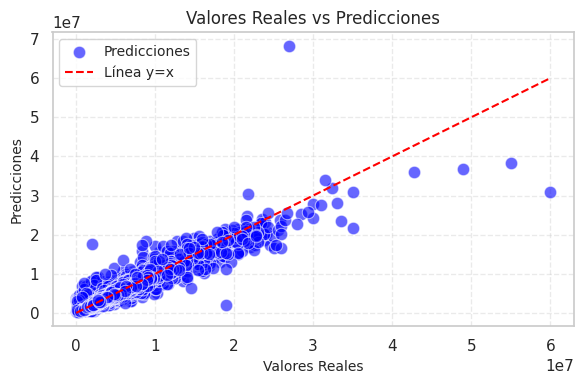

In [ ]:
rnd_rg2 = RandomForestRegressor(n_estimators=500, max_depth=15, min_samples_split=4, random_state=42, n_jobs=-1)
entrenar_modelo(rnd_rg2, 'Random Forest (todas vars)', X_train, y_train, X_test, y_test)

Gran modelo, aumentó el R^2 casi un 2% con respecto al Random Forest con menos variables. Los hiperparámetros elegidos parecen haber sido buenos

In [ ]:
importances = rnd_rg2.feature_importances_

# Crear una serie de pandas para mejor visualización
feature_importance_df = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

print(feature_importance_df)

square                              0.426033
communityAverage                    0.308439
tradeTime                           0.240126
constructionTime                    0.003956
distancia_km_a_subte_mas_cercano    0.003941
piso                                0.003655
followers                           0.002667
ladderRatio                         0.002344
livingRoom                          0.001381
bathRoom                            0.000871
district_7                          0.000623
district_11                         0.000540
district_8                          0.000533
drawingRoom                         0.000483
buildingType_4                      0.000465
district_10                         0.000440
district_6                          0.000386
renovationCondition_4               0.000378
fiveYearsProperty                   0.000373
elevator                            0.000331
buildingType_3                      0.000300
renovationCondition_3               0.000261
buildingSt

### Modelo 6: optimizamos hiperparametros con Random Search CV

Buscamos ver si con todas las variables y grado 2, cual es el alpha óptimo y cuánto nos dan los resultados

In [ ]:
# Definimos un grado y un alpha
degree = 2
alpha = 0.1

pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=degree)),  # Vamos a querer que le aplique esto a cada conjunto de X
    # ("scaler", StandardScaler()),   # Vamos a querer que estandarize (para mejor funcionamiento de la regularizacion)
    ("ridge_regression", Ridge(alpha=alpha, max_iter=5000)) # Vamos a querer que aplique la regresion con regularizacion
])

scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")

# Entonces, va a separar el conjunto en 5 splits y va a iterar esa cantidad de veces
# Va a agarrar cuatro de esos conjuntos para train, va a hacer la regresion Lasso y va a predecir en el conjunto restante
# Va a repetir eso otras 4 veces
print("RMSE por fold:", -scores)
print("RMSE promedio:", -np.mean(scores))
print("Desvío estándar del RMSE:", np.std(-scores))

RMSE por fold: [698070.04002975 702333.1898285  695414.20309224 691389.22388994
 676000.98497323]
RMSE promedio: 692641.5283627312
Desvío estándar del RMSE: 9050.532766992392


In [ ]:
# Buscamos un alpha optimo

param_dist = {
    "ridge_regression__alpha": loguniform(1e-3, 10),  # distribución log-uniforme
    }

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="neg_root_mean_squared_error",
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Mejor alpha (Randomized):", random_search.best_params_)
print("Mejor RMSE (CV, Randomized):", -random_search.best_score_)

Mejor alpha (Randomized): {'ridge_regression__alpha': np.float64(7.579479953348009)}
Mejor RMSE (CV, Randomized): 691691.124607535


El mejor RMSE es apenas mas chico de lo que habiamos conseguido para test en la polinomial de grado 3

In [ ]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
# NO CORRER CODIGO, queremos guardar los resultados porque vinieron de una corrida anterior

# modelo4 = guardo_resultados('Regresion lineal optimizada Random Search', y_test, y_pred, '13 mins')
# modelo4 = pd.concat([modelo4,modelo3])
# modelo4

,Modelo,RMSE,MSE,MAE,R2,Tiempo
0,Regresion lineal optimizada Random Search,7.077932e+05,5.009712e+11,4.538679e+05,0.903732,13 mins
0,Regresion lineal multiple polinomial,6.941085e+05,4.817867e+11,4.426834e+05,0.907418,8.029466
0,Regresion lineal multiple simple (bis),1.113093e+06,1.238976e+12,7.302864e+05,0.761915,0.108613
0,Regresion lineal multiple simple,1.071566e+06,1.148253e+12,6.952304e+05,0.779348,0.291104
0,Baseline,2.281218e+06,5.203953e+12,1.553759e+06,-0.000008,0.004349


In [ ]:
modelo_random_search_data = {
    'Modelo': 'Regresion lineal Random Search',
    'RMSE': 7.077932e+05,
    'MSE': 5.009712e+11,
    'MAE': 4.538679e+05,
    'R2': 0.903732,
    'Tiempo': '13 mins'
}
pd.DataFrame([modelo_random_search_data])

,Modelo,RMSE,MSE,MAE,R2,Tiempo
0,Regresion lineal Random Search,707793.2,5.009712e+11,453867.9,0.903732,13 mins


In [ ]:
resultados_df = pd.concat([resultados_df, pd.DataFrame([modelo_random_search_data])])

In [ ]:
resultados_df = resultados_df.reset_index(drop=True)

## Resultados

In [ ]:
resultados_df

,Modelo,RMSE,MSE,MAE,R2,Tiempo
0,Baseline,2.281218e+06,5.203953e+12,1.553759e+06,-0.000008,0.027377
1,Regresion Lineal (todas vars),1.071653e+06,1.148440e+12,6.952344e+05,0.779312,0.443579
2,Regresion Lineal (vars reducidas),1.113093e+06,1.238976e+12,7.302864e+05,0.761915,0.136792
3,Modelo Polinomial (vars reducidas),6.941085e+05,4.817867e+11,4.426834e+05,0.907418,27.755612
4,Arbol de regresion,6.423928e+05,4.126685e+11,3.460486e+05,0.920700,7.643816
5,Arbol de regresion (vars reducidas),6.490083e+05,4.212118e+11,3.517480e+05,0.919059,4.159652
6,Random Forest (vars reducidas),6.302438e+05,3.972072e+11,3.749405e+05,0.923671,638.484918
7,Random Forest (todas vars),5.515548e+05,3.042127e+11,2.896490e+05,0.941542,1023.998105
8,Regresion lineal Random Search,7.077932e+05,5.009712e+11,4.538679e+05,0.903732,13 mins


Cuidado: al ser el último registro añadido mediante diccionario y cuidado con la inconsistencia de los resultados en su visualización en el DataFrame. Para una mejor referencia, mirar los datos del diccionario directamente.

La regresion lineal con Random Search es un modelo que el modelo polinomial de grado 3 que corrimos, mostrando que en cierta medida la regularización no es tan potente en este caso.

# Conclusión

Nos quedamos con el modelo de Random Forest con todas las variables.

Es el modelo que más tardó en correr pero es con diferencia el mejor. Usamos todas las variables porque los métodos de selección de variables indicaban que casi todas eran buenas, lo que hizo que nos inclináramos por respetar ese criterio considerando que estaba en nuestra capacidad computacional trabajar con esas variables.

El RMSE de nuestro modelo final de Random Forest fue casi 100 mil unidades monetarias menos que el Random Forest de variables reducidas que a su vez era 10 mil unidades monetarias mejor que el modelo anterior.

De esta manera comprendemos la potencia del Random Forest y los árboles de regresión para predecir. El manejo de hiperparámetros a lo largo del manejo de modelos no lineales fue puramente intuitivo con la noción que tenemos de cómo esos hiperparámetros afectan al modelo y permiten reducir el overfitting, por lo que los resultados han sido muy satisfactorios.

Además, el Random Forest final permitió explicar un 4% más de la variabilidad total según lo que muestra el R^2, lo que es un gran avance.

En el gráfico de la identidad entre valores predichos y reales llegamos a ver lo bien que predijo el modelo final, estableciendose como un buen predictor de propiedades inmobiliarias.